<a href="https://colab.research.google.com/github/mdsiam135/ICCIT2025/blob/main/Correlation_figure_Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Correlation of Production with other features:
Production                1.000000
Area                      0.967139
Temperature               0.106506
Year                      0.040888
soil temperature          0.027737
Root Zone Soil Wetness   -0.053226
Surface Soil Wetness     -0.056471
soil moisture            -0.057258
soil moiture             -0.059492
total rain mm            -0.063701
relative humidity 2m     -0.092408
Precipitation            -0.095229
Name: Production, dtype: float64


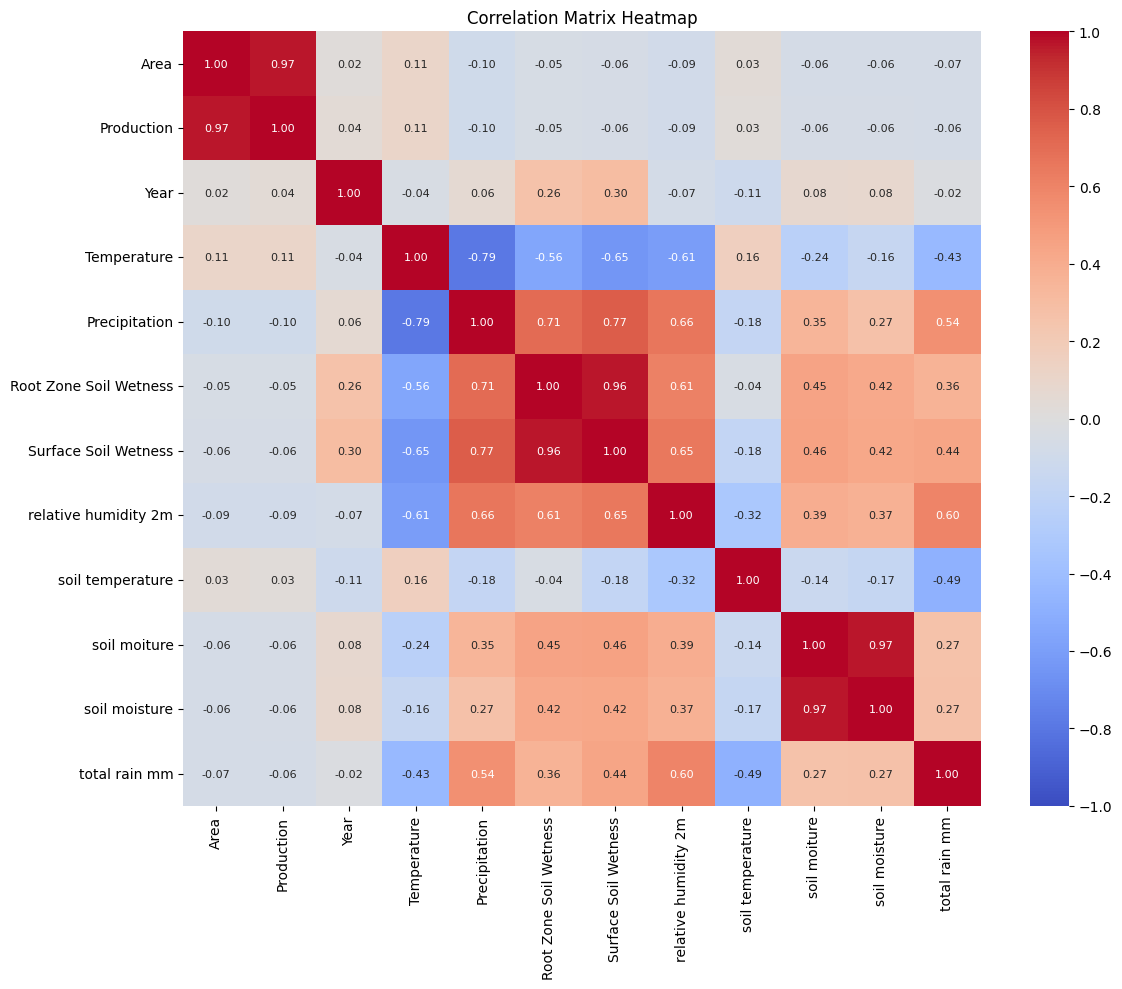

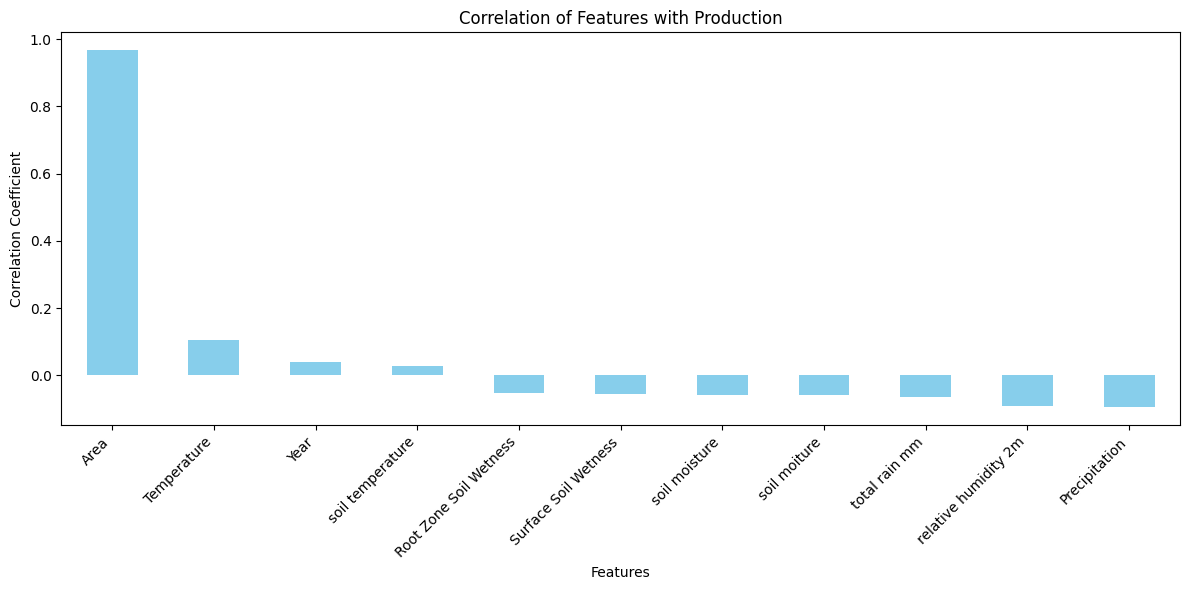


Cleaned feature names:
'Area (Acres)' -> 'Area'
'Production (M.Ton)' -> 'Production'
'Temperature at 2 Meters Range (C)' -> 'Temperature'
'Precipitation Corrected (mm)' -> 'Precipitation'
'Root Zone Soil Wetness (surface to 100 cm below)' -> 'Root Zone Soil Wetness'
'Surface Soil Wetness (surface to 5 cm below)' -> 'Surface Soil Wetness'
'relative_humidity_2m(%)' -> 'relative humidity 2m'
'soil_temperature_0_to_7cm(C)' -> 'soil temperature'
'soil_moiture_7_to_28cm(m³/m³)' -> 'soil moiture'
'soil_moisture_0_to_7cm(m³/m³)' -> 'soil moisture'
'total_rain_mm' -> 'total rain mm'

PDF files saved:
- correlation_heatmap.pdf
- production_correlation_bar.pdf


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/content/drive/MyDrive/UpdatedDataset/Dataset(2014-2024).csv', encoding='latin1')

# Function to clean feature names by removing measurement units and descriptions
def clean_feature_names(df):
    # Create a copy to avoid modifying original dataframe
    df_clean = df.copy()

    # Dictionary to map old column names to clean names
    column_mapping = {}

    for col in df_clean.columns:
        # Remove common measurement units and descriptions
        clean_name = col

        # Remove measurement units in parentheses
        clean_name = clean_name.split('(')[0].strip()

        # Remove specific descriptive text
        clean_name = clean_name.replace('Corrected', '').strip()
        clean_name = clean_name.replace('at 2 Meters Range', '').strip()
        clean_name = clean_name.replace('surface to 100 cm below', '').strip()
        clean_name = clean_name.replace('surface to 5 cm below', '').strip()
        clean_name = clean_name.replace('_0_to_7cm', '').strip()
        clean_name = clean_name.replace('_7_to_28cm', '').strip()

        # Clean up extra spaces and underscores
        clean_name = ' '.join(clean_name.split())
        clean_name = clean_name.replace('_', ' ')

        # Store the mapping
        column_mapping[col] = clean_name

    # Rename columns
    df_clean.rename(columns=column_mapping, inplace=True)

    return df_clean

# Clean the feature names
df_clean = clean_feature_names(df)

# Calculate correlation matrix
correlation_matrix = df_clean.corr(numeric_only=True)

# Get correlations with Production (assuming it's now called 'Production')
production_col = 'Production'
if production_col not in correlation_matrix.columns:
    # Find the production column with any remaining text
    production_cols = [col for col in correlation_matrix.columns if 'Production' in col]
    if production_cols:
        production_col = production_cols[0]
    else:
        print("Warning: Could not find Production column")
        production_col = correlation_matrix.columns[1]  # Use second column as fallback

production_corr = correlation_matrix[production_col].sort_values(ascending=False)

# Display the correlations
print("Correlation of Production with other features:")
print(production_corr)

# Visualize the correlations and save as PDF
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            vmin=-1,
            vmax=1,
            cbar_kws={'ticks': [1, 0.8, 0.6, 0.4, 0.2, 0.0, -0.2, -0.4, -0.6, -0.8, -1]},
            annot_kws={"size": 8})
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()

# Save the heatmap as PDF
plt.savefig('/content/drive/MyDrive/UpdatedDataset/correlation_heatmap.pdf',
            format='pdf',
            bbox_inches='tight',
            dpi=300)

plt.show()

# Plot top correlations with Production and save as PDF
plt.figure(figsize=(12, 6))
production_corr.drop(production_col).plot(kind='bar', color='skyblue')
plt.title(f'Correlation of Features with {production_col}')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the bar chart as PDF
plt.savefig('/content/drive/MyDrive/UpdatedDataset/production_correlation_bar.pdf',
            format='pdf',
            bbox_inches='tight',
            dpi=300)

plt.show()

# Print the cleaned column names for reference
print("\nCleaned feature names:")
for old_name, new_name in zip(df.columns, df_clean.columns):
    if old_name != new_name:
        print(f"'{old_name}' -> '{new_name}'")

print("\nPDF files saved:")
print("- correlation_heatmap.pdf")
print("- production_correlation_bar.pdf")

Correlation of Production with other features:
Production                1.000000
Area                      0.966715
Temperature               0.099738
Year                      0.039229
soil temperature          0.024295
Root Zone Soil Wetness   -0.051389
soil moisture            -0.051886
Surface Soil Wetness     -0.053710
soil moiture             -0.054452
total rain mm            -0.057698
relative humidity 2m     -0.086091
Precipitation            -0.089087
Name: Production, dtype: float64


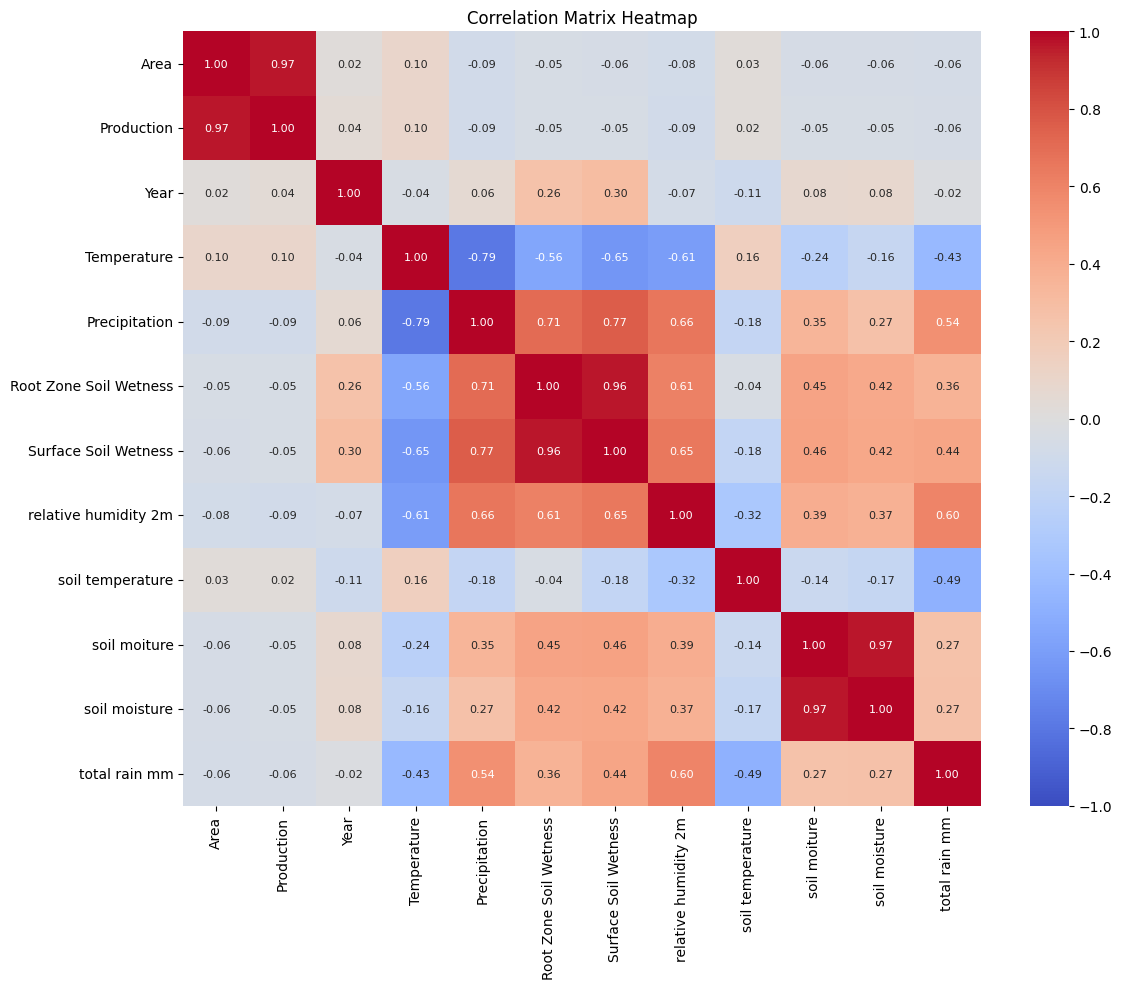

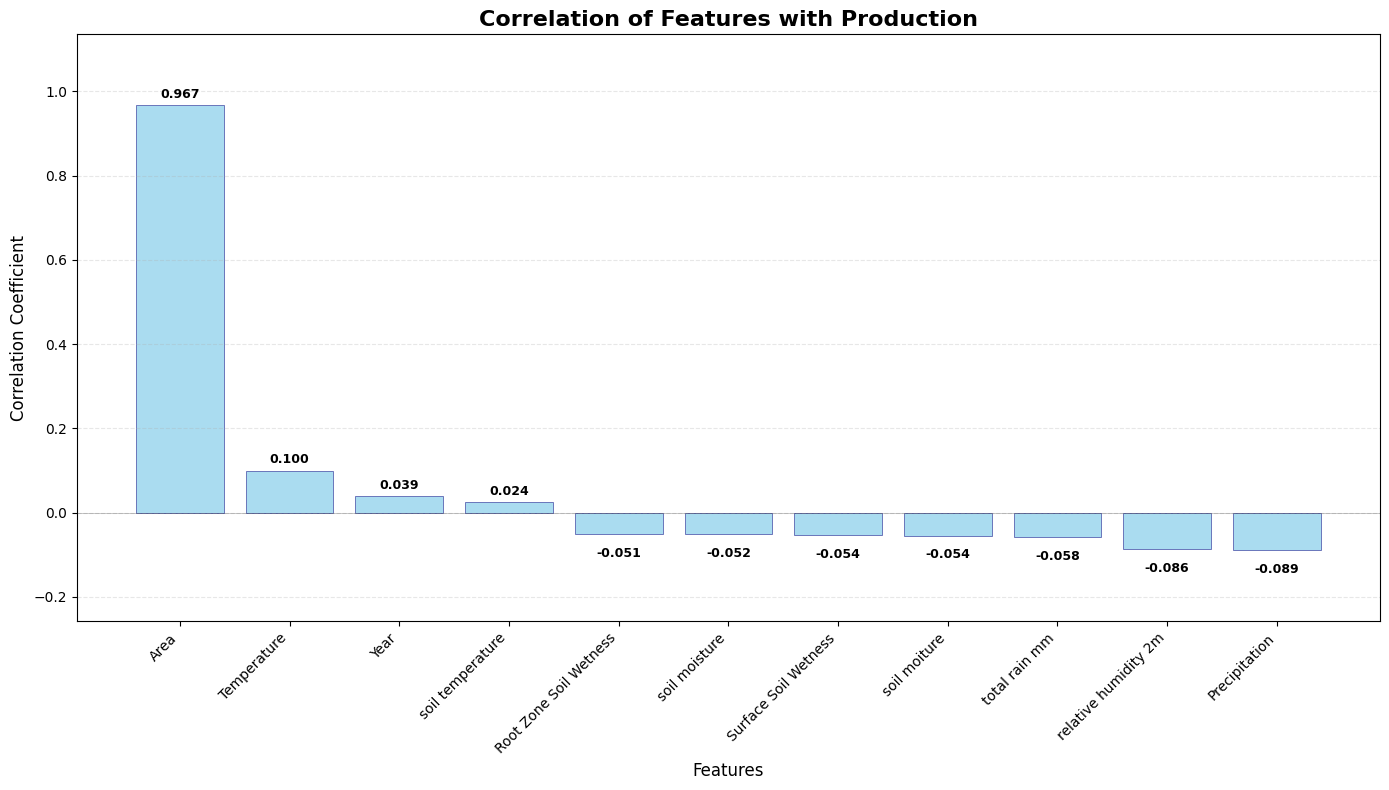

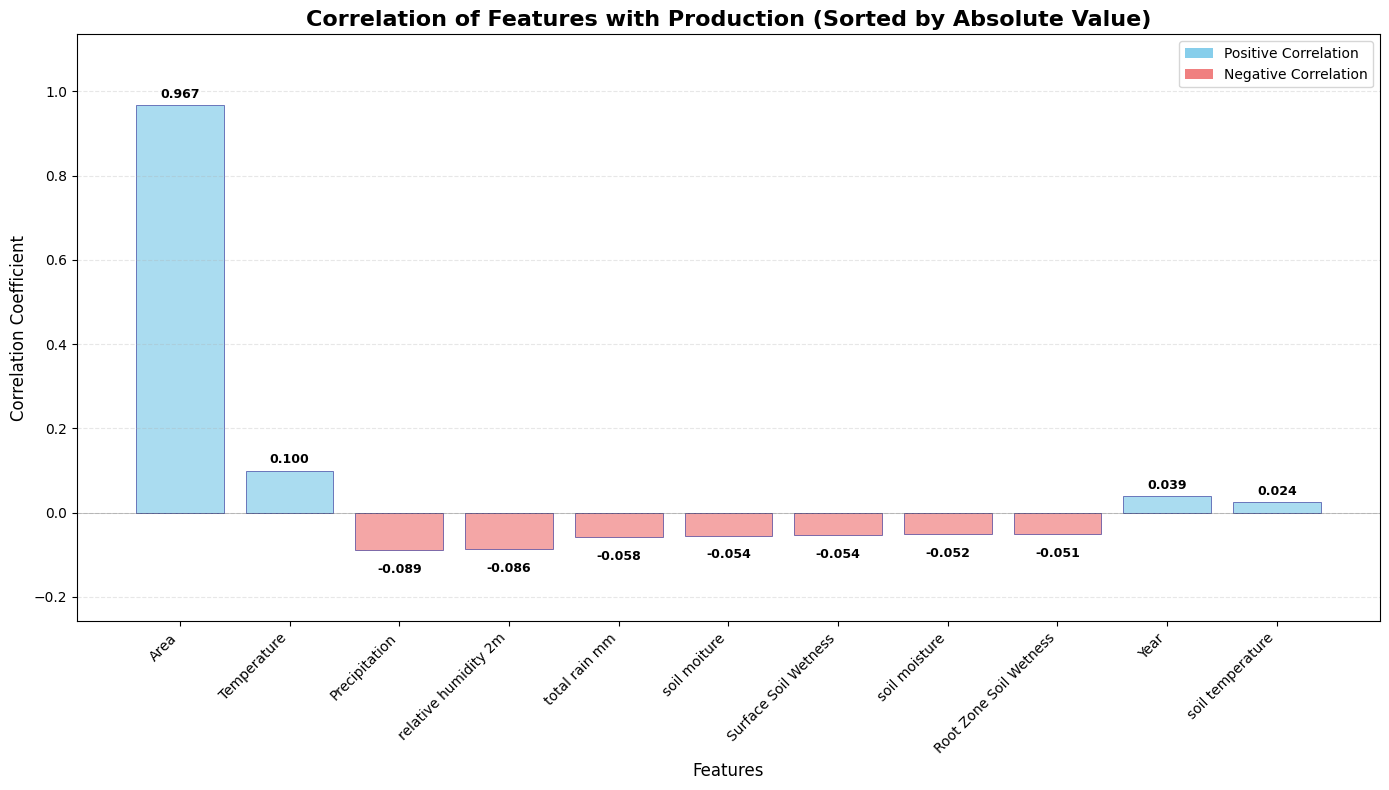


Cleaned feature names:
'Area (Acres)' -> 'Area'
'Production (M.Ton)' -> 'Production'
'Temperature at 2 Meters Range (C)' -> 'Temperature'
'Precipitation Corrected (mm)' -> 'Precipitation'
'Root Zone Soil Wetness (surface to 100 cm below)' -> 'Root Zone Soil Wetness'
'Surface Soil Wetness (surface to 5 cm below)' -> 'Surface Soil Wetness'
'relative_humidity_2m(%)' -> 'relative humidity 2m'
'soil_temperature_0_to_7cm(C)' -> 'soil temperature'
'soil_moiture_7_to_28cm(m³/m³)' -> 'soil moiture'
'soil_moisture_0_to_7cm(m³/m³)' -> 'soil moisture'
'total_rain_mm' -> 'total rain mm'

PDF files saved:
- correlation_heatmap.pdf
- production_correlation_bar.pdf
- production_correlation_bar_sorted.pdf

Top 5 positive correlations with Production:
  Area: 0.967
  Temperature: 0.100
  Year: 0.039
  soil temperature: 0.024

Top 5 negative correlations with Production:
  Surface Soil Wetness: -0.054
  soil moiture: -0.054
  total rain mm: -0.058
  relative humidity 2m: -0.086
  Precipitation: -0.089


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv('/content/drive/MyDrive/UpdatedDataset/Dataset_integration(2014-2024).csv', encoding='latin1')

# Function to clean feature names by removing measurement units and descriptions
def clean_feature_names(df):
    # Create a copy to avoid modifying original dataframe
    df_clean = df.copy()

    # Dictionary to map old column names to clean names
    column_mapping = {}

    for col in df_clean.columns:
        # Remove common measurement units and descriptions
        clean_name = col

        # Remove measurement units in parentheses
        clean_name = clean_name.split('(')[0].strip()

        # Remove specific descriptive text
        clean_name = clean_name.replace('Corrected', '').strip()
        clean_name = clean_name.replace('at 2 Meters Range', '').strip()
        clean_name = clean_name.replace('surface to 100 cm below', '').strip()
        clean_name = clean_name.replace('surface to 5 cm below', '').strip()
        clean_name = clean_name.replace('_0_to_7cm', '').strip()
        clean_name = clean_name.replace('_7_to_28cm', '').strip()

        # Clean up extra spaces and underscores
        clean_name = ' '.join(clean_name.split())
        clean_name = clean_name.replace('_', ' ')

        # Store the mapping
        column_mapping[col] = clean_name

    # Rename columns
    df_clean.rename(columns=column_mapping, inplace=True)

    return df_clean

# Clean the feature names
df_clean = clean_feature_names(df)

# Calculate correlation matrix
correlation_matrix = df_clean.corr(numeric_only=True)

# Get correlations with Production (assuming it's now called 'Production')
production_col = 'Production'
if production_col not in correlation_matrix.columns:
    # Find the production column with any remaining text
    production_cols = [col for col in correlation_matrix.columns if 'Production' in col]
    if production_cols:
        production_col = production_cols[0]
    else:
        print("Warning: Could not find Production column")
        production_col = correlation_matrix.columns[1]  # Use second column as fallback

production_corr = correlation_matrix[production_col].sort_values(ascending=False)

# Display the correlations
print("Correlation of Production with other features:")
print(production_corr)

# Visualize the correlations and save as PDF
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            vmin=-1,
            vmax=1,
            cbar_kws={'ticks': [1, 0.8, 0.6, 0.4, 0.2, 0.0, -0.2, -0.4, -0.6, -0.8, -1]},
            annot_kws={"size": 8})
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()

# Save the heatmap as PDF
plt.savefig('/content/drive/MyDrive/UpdatedDataset/correlation_heatmap.pdf',
            format='pdf',
            bbox_inches='tight',
            dpi=300)

plt.show()

# Plot top correlations with Production with correlation values displayed
plt.figure(figsize=(14, 8))

# Remove the production column itself from the correlation data
production_corr_filtered = production_corr.drop(production_col)

# Create the bar plot
bars = plt.bar(range(len(production_corr_filtered)),
               production_corr_filtered.values,
               color='skyblue',
               alpha=0.7,
               edgecolor='navy',
               linewidth=0.5)

# Add correlation values on top of each bar
for i, (bar, value) in enumerate(zip(bars, production_corr_filtered.values)):
    height = bar.get_height()
    # Position the text slightly above the bar for positive values, below for negative
    y_pos = height + 0.01 if height >= 0 else height - 0.03
    plt.text(bar.get_x() + bar.get_width()/2., y_pos,
             f'{value:.3f}',
             ha='center', va='bottom' if height >= 0 else 'top',
             fontsize=9, fontweight='bold')

plt.title(f'Correlation of Features with {production_col}', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(range(len(production_corr_filtered)),
           production_corr_filtered.index,
           rotation=45, ha='right')

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.3)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Adjust y-axis limits to accommodate text labels
y_min, y_max = plt.ylim()
padding = (y_max - y_min) * 0.1
plt.ylim(y_min - padding, y_max + padding)

plt.tight_layout()

# Save the bar chart as PDF
plt.savefig('/content/drive/MyDrive/UpdatedDataset/production_correlation_bar.pdf',
            format='pdf',
            bbox_inches='tight',
            dpi=300)

plt.show()

# Create an additional sorted bar chart showing absolute correlation values
plt.figure(figsize=(14, 8))

# Sort by absolute correlation values for better visualization
production_corr_abs_sorted = production_corr_filtered.reindex(
    production_corr_filtered.abs().sort_values(ascending=False).index
)

# Create the bar plot with color coding based on positive/negative correlation
colors = ['lightcoral' if x < 0 else 'skyblue' for x in production_corr_abs_sorted.values]
bars = plt.bar(range(len(production_corr_abs_sorted)),
               production_corr_abs_sorted.values,
               color=colors,
               alpha=0.7,
               edgecolor='navy',
               linewidth=0.5)

# Add correlation values on top of each bar
for i, (bar, value) in enumerate(zip(bars, production_corr_abs_sorted.values)):
    height = bar.get_height()
    y_pos = height + 0.01 if height >= 0 else height - 0.03
    plt.text(bar.get_x() + bar.get_width()/2., y_pos,
             f'{value:.3f}',
             ha='center', va='bottom' if height >= 0 else 'top',
             fontsize=9, fontweight='bold')

plt.title(f'Correlation of Features with {production_col} (Sorted by Absolute Value)',
          fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(range(len(production_corr_abs_sorted)),
           production_corr_abs_sorted.index,
           rotation=45, ha='right')

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.3)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Adjust y-axis limits to accommodate text labels
y_min, y_max = plt.ylim()
padding = (y_max - y_min) * 0.1
plt.ylim(y_min - padding, y_max + padding)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='skyblue', label='Positive Correlation'),
                   Patch(facecolor='lightcoral', label='Negative Correlation')]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()

# Save the sorted bar chart as PDF
plt.savefig('/content/drive/MyDrive/UpdatedDataset/production_correlation_bar_sorted.pdf',
            format='pdf',
            bbox_inches='tight',
            dpi=300)

plt.show()

# Print the cleaned column names for reference
print("\nCleaned feature names:")
for old_name, new_name in zip(df.columns, df_clean.columns):
    if old_name != new_name:
        print(f"'{old_name}' -> '{new_name}'")

print("\nPDF files saved:")
print("- correlation_heatmap.pdf")
print("- production_correlation_bar.pdf")
print("- production_correlation_bar_sorted.pdf")

# Print top correlations for quick reference
print(f"\nTop 5 positive correlations with {production_col}:")
positive_corr = production_corr_filtered[production_corr_filtered > 0].head(5)
for feature, corr in positive_corr.items():
    print(f"  {feature}: {corr:.3f}")

print(f"\nTop 5 negative correlations with {production_col}:")
negative_corr = production_corr_filtered[production_corr_filtered < 0].tail(5)
for feature, corr in negative_corr.items():
    print(f"  {feature}: {corr:.3f}")

Correlation of Production with other features:
Production                1.000000
Area                      0.966715
Temperature               0.099738
Year                      0.039229
soil temperature          0.024295
Root Zone Soil Wetness   -0.051389
soil moisture            -0.051886
Surface Soil Wetness     -0.053710
soil moiture             -0.054452
total rain mm            -0.057698
relative humidity 2m     -0.086091
Precipitation            -0.089087
Name: Production, dtype: float64


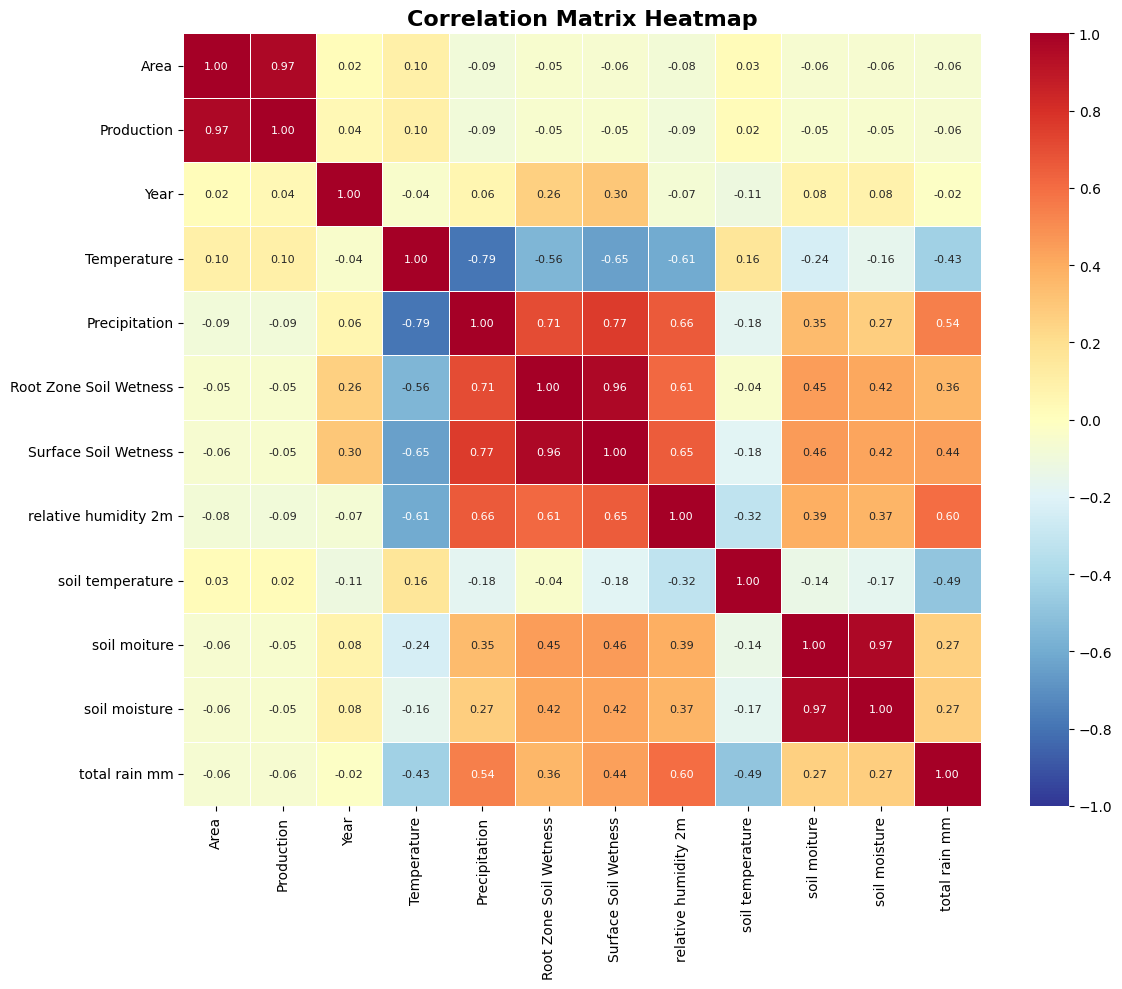

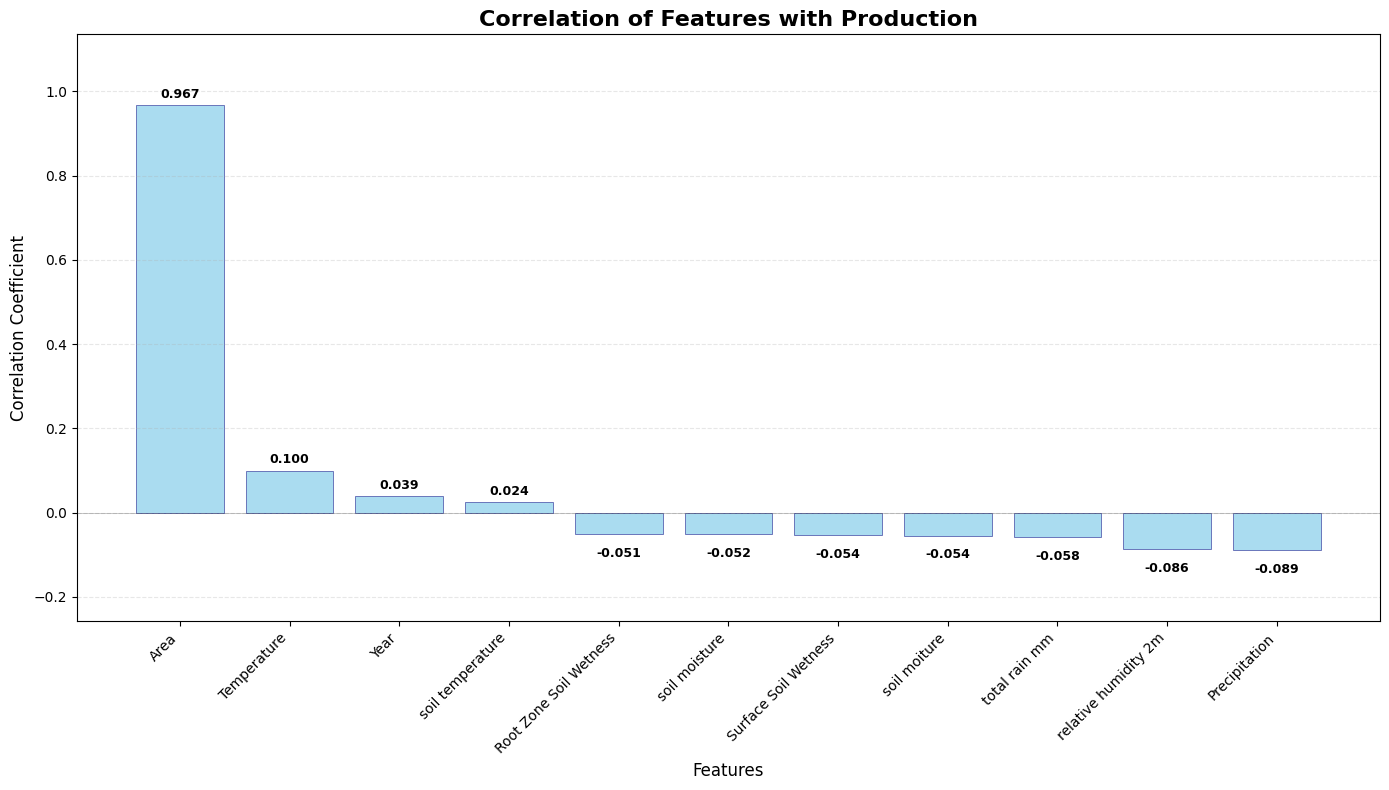

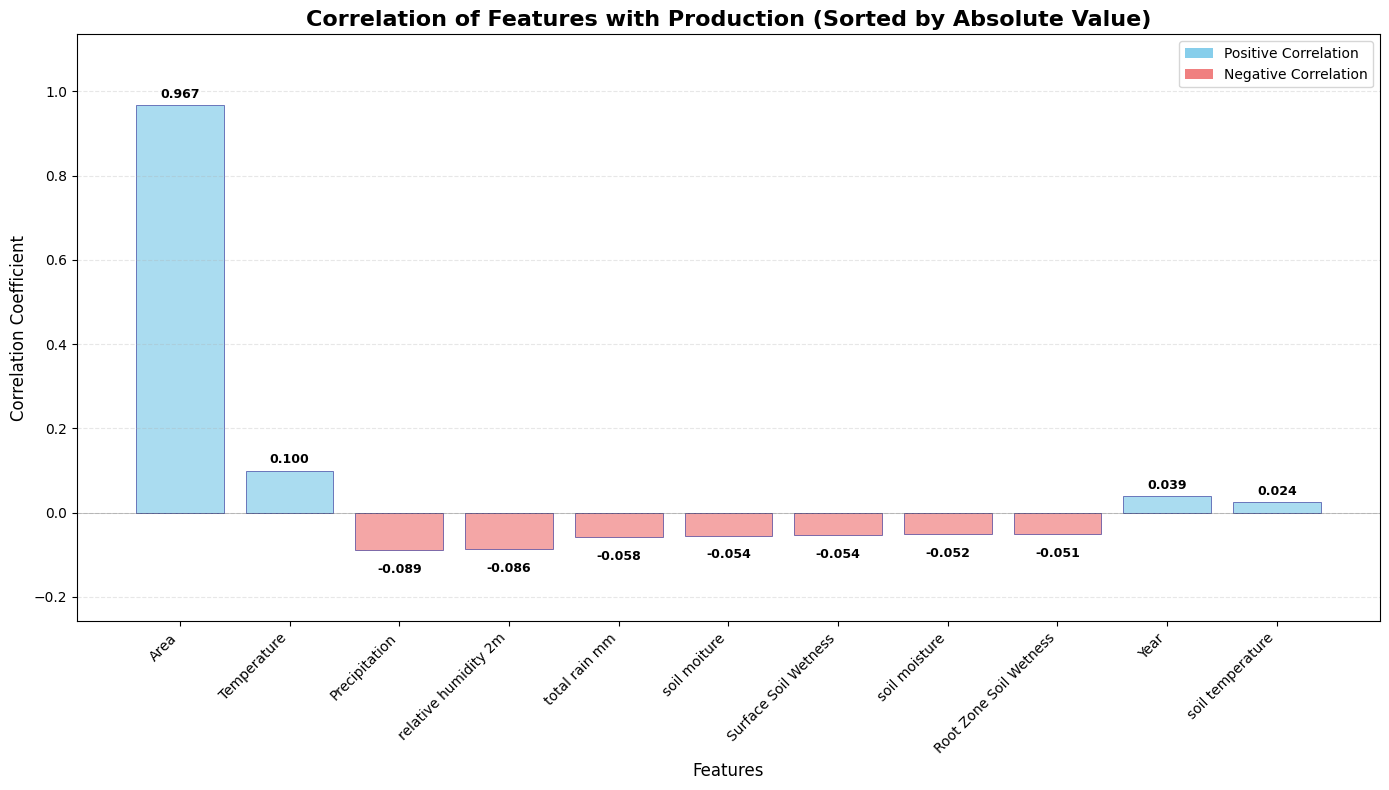


Cleaned feature names:
'Area (Acres)' -> 'Area'
'Production (M.Ton)' -> 'Production'
'Temperature at 2 Meters Range (C)' -> 'Temperature'
'Precipitation Corrected (mm)' -> 'Precipitation'
'Root Zone Soil Wetness (surface to 100 cm below)' -> 'Root Zone Soil Wetness'
'Surface Soil Wetness (surface to 5 cm below)' -> 'Surface Soil Wetness'
'relative_humidity_2m(%)' -> 'relative humidity 2m'
'soil_temperature_0_to_7cm(C)' -> 'soil temperature'
'soil_moiture_7_to_28cm(m³/m³)' -> 'soil moiture'
'soil_moisture_0_to_7cm(m³/m³)' -> 'soil moisture'
'total_rain_mm' -> 'total rain mm'

PDF files saved:
- correlation_heatmap.pdf
- production_correlation_bar.pdf
- production_correlation_bar_sorted.pdf

Top 5 positive correlations with Production:
  Area: 0.967
  Temperature: 0.100
  Year: 0.039
  soil temperature: 0.024

Top 5 negative correlations with Production:
  Surface Soil Wetness: -0.054
  soil moiture: -0.054
  total rain mm: -0.058
  relative humidity 2m: -0.086
  Precipitation: -0.089


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv('/content/drive/MyDrive/UpdatedDataset/Dataset_integration(2014-2024).csv', encoding='latin1')

# Function to clean feature names by removing measurement units and descriptions
def clean_feature_names(df):
    # Create a copy to avoid modifying original dataframe
    df_clean = df.copy()

    # Dictionary to map old column names to clean names
    column_mapping = {}

    for col in df_clean.columns:
        # Remove common measurement units and descriptions
        clean_name = col

        # Remove measurement units in parentheses
        clean_name = clean_name.split('(')[0].strip()

        # Remove specific descriptive text
        clean_name = clean_name.replace('Corrected', '').strip()
        clean_name = clean_name.replace('at 2 Meters Range', '').strip()
        clean_name = clean_name.replace('surface to 100 cm below', '').strip()
        clean_name = clean_name.replace('surface to 5 cm below', '').strip()
        clean_name = clean_name.replace('_0_to_7cm', '').strip()
        clean_name = clean_name.replace('_7_to_28cm', '').strip()

        # Clean up extra spaces and underscores
        clean_name = ' '.join(clean_name.split())
        clean_name = clean_name.replace('_', ' ')

        # Store the mapping
        column_mapping[col] = clean_name

    # Rename columns
    df_clean.rename(columns=column_mapping, inplace=True)

    return df_clean

# Clean the feature names
df_clean = clean_feature_names(df)

# Calculate correlation matrix
correlation_matrix = df_clean.corr(numeric_only=True)

# Get correlations with Production (assuming it's now called 'Production')
production_col = 'Production'
if production_col not in correlation_matrix.columns:
    # Find the production column with any remaining text
    production_cols = [col for col in correlation_matrix.columns if 'Production' in col]
    if production_cols:
        production_col = production_cols[0]
    else:
        print("Warning: Could not find Production column")
        production_col = correlation_matrix.columns[1]  # Use second column as fallback

production_corr = correlation_matrix[production_col].sort_values(ascending=False)

# Display the correlations
print("Correlation of Production with other features:")
print(production_corr)

# Visualize the correlations and save as PDF
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap='RdYlBu_r',  # Changed from 'coolwarm' to 'RdYlBu_r'
            center=0,
            vmin=-1,
            vmax=1,
            cbar_kws={'ticks': [1, 0.8, 0.6, 0.4, 0.2, 0.0, -0.2, -0.4, -0.6, -0.8, -1]},
            annot_kws={"size": 8},
            linewidths=0.5,
            linecolor='white')
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()

# Save the heatmap as PDF
plt.savefig('/content/drive/MyDrive/UpdatedDataset/correlation_heatmap.pdf',
            format='pdf',
            bbox_inches='tight',
            dpi=300)

plt.show()

# Plot top correlations with Production with correlation values displayed
plt.figure(figsize=(14, 8))

# Remove the production column itself from the correlation data
production_corr_filtered = production_corr.drop(production_col)

# Create the bar plot
bars = plt.bar(range(len(production_corr_filtered)),
               production_corr_filtered.values,
               color='skyblue',
               alpha=0.7,
               edgecolor='navy',
               linewidth=0.5)

# Add correlation values on top of each bar
for i, (bar, value) in enumerate(zip(bars, production_corr_filtered.values)):
    height = bar.get_height()
    # Position the text slightly above the bar for positive values, below for negative
    y_pos = height + 0.01 if height >= 0 else height - 0.03
    plt.text(bar.get_x() + bar.get_width()/2., y_pos,
             f'{value:.3f}',
             ha='center', va='bottom' if height >= 0 else 'top',
             fontsize=9, fontweight='bold')

plt.title(f'Correlation of Features with {production_col}', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(range(len(production_corr_filtered)),
           production_corr_filtered.index,
           rotation=45, ha='right')

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.3)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Adjust y-axis limits to accommodate text labels
y_min, y_max = plt.ylim()
padding = (y_max - y_min) * 0.1
plt.ylim(y_min - padding, y_max + padding)

plt.tight_layout()

# Save the bar chart as PDF
plt.savefig('/content/drive/MyDrive/UpdatedDataset/production_correlation_bar.pdf',
            format='pdf',
            bbox_inches='tight',
            dpi=300)

plt.show()

# Create an additional sorted bar chart showing absolute correlation values
plt.figure(figsize=(14, 8))

# Sort by absolute correlation values for better visualization
production_corr_abs_sorted = production_corr_filtered.reindex(
    production_corr_filtered.abs().sort_values(ascending=False).index
)

# Create the bar plot with color coding based on positive/negative correlation
colors = ['lightcoral' if x < 0 else 'skyblue' for x in production_corr_abs_sorted.values]
bars = plt.bar(range(len(production_corr_abs_sorted)),
               production_corr_abs_sorted.values,
               color=colors,
               alpha=0.7,
               edgecolor='navy',
               linewidth=0.5)

# Add correlation values on top of each bar
for i, (bar, value) in enumerate(zip(bars, production_corr_abs_sorted.values)):
    height = bar.get_height()
    y_pos = height + 0.01 if height >= 0 else height - 0.03
    plt.text(bar.get_x() + bar.get_width()/2., y_pos,
             f'{value:.3f}',
             ha='center', va='bottom' if height >= 0 else 'top',
             fontsize=9, fontweight='bold')

plt.title(f'Correlation of Features with {production_col} (Sorted by Absolute Value)',
          fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(range(len(production_corr_abs_sorted)),
           production_corr_abs_sorted.index,
           rotation=45, ha='right')

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.3)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Adjust y-axis limits to accommodate text labels
y_min, y_max = plt.ylim()
padding = (y_max - y_min) * 0.1
plt.ylim(y_min - padding, y_max + padding)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='skyblue', label='Positive Correlation'),
                   Patch(facecolor='lightcoral', label='Negative Correlation')]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()

# Save the sorted bar chart as PDF
plt.savefig('/content/drive/MyDrive/UpdatedDataset/production_correlation_bar_sorted.pdf',
            format='pdf',
            bbox_inches='tight',
            dpi=300)

plt.show()

# Print the cleaned column names for reference
print("\nCleaned feature names:")
for old_name, new_name in zip(df.columns, df_clean.columns):
    if old_name != new_name:
        print(f"'{old_name}' -> '{new_name}'")

print("\nPDF files saved:")
print("- correlation_heatmap.pdf")
print("- production_correlation_bar.pdf")
print("- production_correlation_bar_sorted.pdf")

# Print top correlations for quick reference
print(f"\nTop 5 positive correlations with {production_col}:")
positive_corr = production_corr_filtered[production_corr_filtered > 0].head(5)
for feature, corr in positive_corr.items():
    print(f"  {feature}: {corr:.3f}")

print(f"\nTop 5 negative correlations with {production_col}:")
negative_corr = production_corr_filtered[production_corr_filtered < 0].tail(5)
for feature, corr in negative_corr.items():
    print(f"  {feature}: {corr:.3f}")